In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 16

In [16]:
def jaccard(intersection, union):
    return float(intersection) / float(union)

def dice(intersection, ref, test):
    return 2*float(intersection) / (float(ref) + float(test))

#### JACCARD Segmentation contains constant amount of False and varying size of P

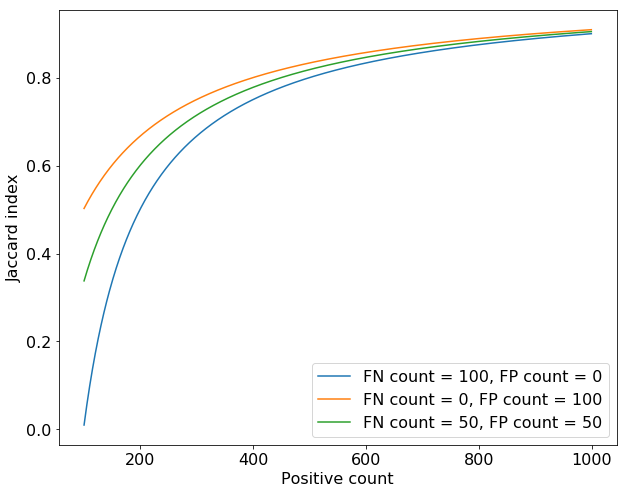

In [25]:
false_volume = 100
p_volume = range(101, 1000, 1)
j = [jaccard(v-false_volume, v) for v in p_volume]
plt.plot(p_volume, j, label='FN count = 100, FP count = 0')

j = [jaccard(v-false_volume/2.0, v+false_volume/2.0) for v in p_volume]
plt.plot(p_volume, j, label='FN count = 50, FP count = 50')

j = [jaccard(v, v+false_volume) for v in p_volume]
plt.plot(p_volume, j, label='FN count = 0, FP count = 100')


plt.ylabel('Jaccard index')
plt.xlabel('Positive count')
plt.legend()
plt.savefig('../../assets/liver-tumor-segmentation-evaluation/jaccard.png')

#### DICE Segmentation contains constant amount of False and varying size of P

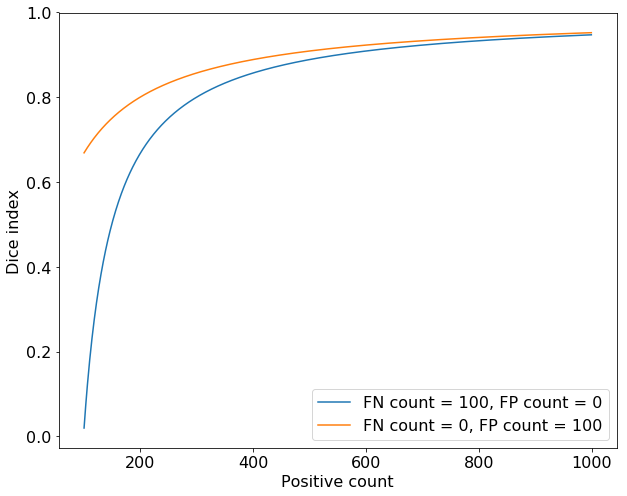

In [24]:
false_volume = 100
p_volume = range(101, 1000, 1)
dsc = [dice(v-false_volume, v, v-false_volume) for v in p_volume]
plt.plot(p_volume, dsc, label='FN count = 100, FP count = 0')

dsc = [dice(v, v, v+false_volume) for v in p_volume]
plt.plot(p_volume, dsc, label='FN count = 0, FP count = 100')

plt.ylabel('Dice index')
plt.xlabel('Positive count')
plt.legend()
plt.savefig('../../assets/liver-tumor-segmentation-evaluation/dice.png')

#### DICE vs JACCARD

In [19]:
def j_from_dsc(dsc):
    return float(dsc) / (2 - dsc)

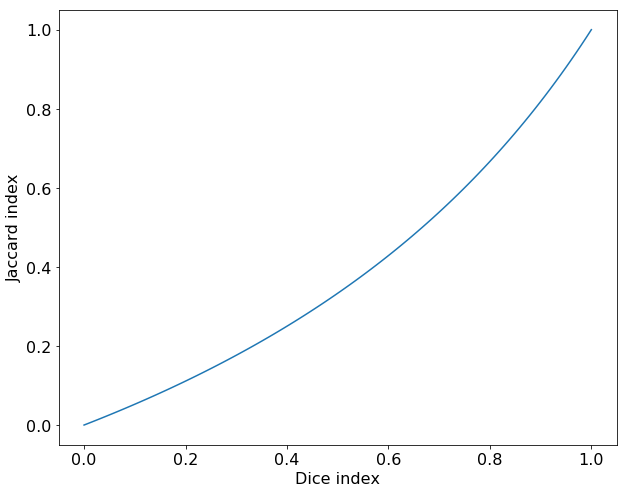

In [22]:
dsc = np.linspace(0, 1, 100)
j = [j_from_dsc(d) for d in dsc]

plt.plot(dsc, j)


plt.ylabel('Jaccard index')
plt.xlabel('Dice index')
plt.savefig('../../assets/liver-tumor-segmentation-evaluation/jaccard_vs_dice.png')